# Analysis of Suicide between 1985 to 2016 (US) 

Introduction-

Facebook became public to users in 2006 and since then it has grown to 2.7 billion users. 

Our analysis will evaluate the effects of social media on mental health before and after the popularity of social media, Facebook in this case, among young women living in the United States. 

During our analysis, we will compare the suicide counts before Facebook's emergence and after for females between the ages of 15-24 years old in the United States. 

Hypothesis: we will see a rise in the average number of suicides among women 15-24 age bracket in the United States after the year 2006 due to the popularity of Facebook.

Source Website: 
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

### Load the dataset

In [1]:
import os

In [2]:
import pandas as pd
suicide = pd.read_csv('../input/suicide-rates-overview-1985-to-2016/master.csv') #loading dataset into dataframe called united_states

In [3]:
len(suicide) #this dataframe contains 27820 records

27820

### Dataframe for United States

In [4]:
united_states = suicide[suicide.country == 'United States'] #creating a view of the overall dataframe--
# filtering the data to only contain records for United States 

In [5]:
len(united_states) #this dataframe contains 372 records

372

In [6]:
united_states.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X


### Dataframes for Before 2006 and After 2006 in US

In [7]:
# Further narrowing down our dataset #Splitting our data into two data frames: 
#suicide data before 2006 and after 2006 in the US

#Dataframe for suicide counts before 2006 in the US
data_of_suicides_before_2006 = united_states[united_states.year < 2006]

#Dataframe for suicide counts including and after 2006 in the US
data_of_suicides_after_2006 = united_states[united_states.year >= 2006]

#Array that contains the suicide counts for before the year 2006 in US
num_of_suicides_before_2006 = [s for s in data_of_suicides_before_2006.suicides_no]

#Array that contains the suicide counts for after the year 2006 in US
num_of_suicides_after_2006 = [s for s in data_of_suicides_after_2006.suicides_no]


### DataFrames ONLY Females in the United States 

In [8]:
# GENERAL SUICIDE TREND AMONG WOMEN IN US- BEFORE 2006 VS. AFTER 2006
#Further narrowing down our dataset #Splitting our data into two data frames: 
#suicide data before 2006 for only females and after 2006 for only females in the US

#Dataframe for only females in the United States before 2006
data_of_suicides_before_2006_female_only = data_of_suicides_before_2006[data_of_suicides_before_2006.sex == 'female']

#Dataframe for only females in the United States including and after 2006
data_of_suicides_after_2006_female_only = data_of_suicides_after_2006[data_of_suicides_after_2006.sex == 'female']

#Array that contains the only female suicide counts before the year 2006 in US
num_of_suicides_before_2006_females = [s for s in data_of_suicides_before_2006_female_only.suicides_no]

#Array that contains the only female suicide counts after the year 2006 in US
num_of_suicides_after_2006_females = [s for s in data_of_suicides_after_2006_female_only.suicides_no]

In [9]:
# SUICIDE TREND AMONG WOMEN 15-24 YEARS OF AGE IN US- BEFORE 2006 VS. AFTER 2006
#Further narrowing down our dataset #Splitting our data into two more data frames: 
#suicide data before 2006 for only females and after 2006 for only females in the US for age range 15-24 

# DF for females 15-24 in US BEFORE 2006
suicide_data_before_2006_F_15to24 = data_of_suicides_before_2006_female_only[data_of_suicides_before_2006_female_only.age == '15-24 years']

# DF for females 15-24 in US AFTER 2006
suicide_data_after_2006_F_15to24 = data_of_suicides_after_2006_female_only[data_of_suicides_after_2006_female_only.age == '15-24 years']

#Array that contains the only female 15-24 years suicide counts before the year 2006 in US
suicide_data_before_2006_F_15to24_only = [s for s in suicide_data_before_2006_F_15to24.suicides_no]

#Array that contains the only female 15-24 years suicide counts after the year 2006 in US
suicide_data_after_2006_F_15to24_only = [s for s in suicide_data_after_2006_F_15to24.suicides_no]

### Descriptive Suicide Statistics

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
round(united_states['suicides_no'].describe(),2)

count      372.00
mean      2779.60
std       2752.72
min         50.00
25%        558.75
50%       2193.00
75%       4145.50
max      11767.00
Name: suicides_no, dtype: float64

In [12]:
united_states['HDI for year'].isnull().head(15) # one column has null/missing values....we are not using this column in our analysis
#the columns we're are looking at do not have missing values

26848    False
26849    False
26850    False
26851    False
26852    False
26853    False
26854    False
26855    False
26856    False
26857    False
26858    False
26859    False
26860     True
26861     True
26862     True
Name: HDI for year, dtype: bool

Text(0.5, 1.0, 'Suicide Counts in the United States')

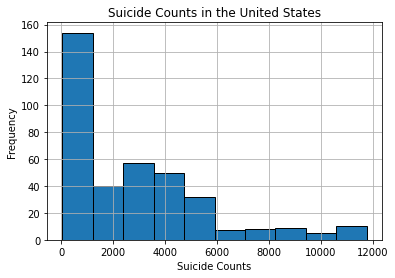

In [13]:
# # Bar Plot for the sucicide counts in the United States between the year 1985 and 2006.
united_states['suicides_no'].hist(edgecolor ='black')
plt.xlabel("Suicide Counts", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Suicide Counts in the United States")

In [14]:
# create a only US female DF for all years to calc min and max suicide counts below
united_states_female = united_states[united_states.sex == 'female']

In [15]:
# create a only US female 15-24 DF for before 2006--for below chart
united_states_female_15to24_before2006 = data_of_suicides_before_2006_female_only[data_of_suicides_before_2006_female_only.age == '15-24 years']

In [16]:
# create a only US female 15-24 DF for after 2006-- for below chart

united_states_female_15to24_after2006 = data_of_suicides_after_2006_female_only[data_of_suicides_after_2006_female_only.age == '15-24 years']

### Determining minimum and maximum number of suicides in the United States

In [17]:
#Find the min number of female suicides 
min_suicides = min(united_states_female.suicides_no)
min_year = united_states_female[united_states_female.suicides_no == min_suicides].year
min_age = united_states_female[united_states_female.suicides_no == min_suicides].age

#Find the max number of female suicides b
max_suicides = max(united_states_female.suicides_no)
max_year = united_states_female[united_states_female.suicides_no == max_suicides].year
max_age = united_states_female[united_states_female.suicides_no == max_suicides].age

print(f'The minimum of suicides was {min_suicides} in the year {min_year.to_string(index=False)} for age group {min_age.to_string(index=False)}')

print(f'The maximum of suicides was {max_suicides} in the year {max_year.to_string(index=False)} for age group {max_age.to_string(index=False)}')

# As we can see the there the least number of suicides among women occurred back in 1999 before the rise of social medias,
# such as facebook.

# At the same time we can see that the number of suicides among women occured in 2015, well after facebook's popularity
# and the emergence of new social media such as instagram and snapchat.

The minimum of suicides was 50 in the year 1999 for age group 5-14 years
The maximum of suicides was 4053 in the year 2015 for age group 35-54 years


### Suicides mean, median, variance, and standard deviation

In [18]:
import statistics as stat
#from scipy import stats 

#SUICIDE STATS BEFORE 2006 VS. AFTER 2006 AMONG ALL IN US

#SUCIDE BEFORE 2006 MEAN, MEDIAN, VARIANCE, AND STANDARD DEVIATION
print(f'stat.mean before 2006  = {stat.mean(num_of_suicides_before_2006):.2f}')
print(f'stat.median before 2006 = {stat.median(num_of_suicides_before_2006):.2f}')
print(f'stat.pvariance before 2006 = {stat.pvariance(num_of_suicides_before_2006):.2f}')
print(f'stat.pstdev before 2006 = {stat.pstdev(num_of_suicides_before_2006):.2f}')

#SUICIDE AFTER 2006 MEAN, MEDIAN, VARIANCE, AND STANDARD DEVIATION
print(f'stat.mean after 2006 = {stat.mean(num_of_suicides_after_2006):.2f}')
print(f'stat.median after 2006 = {stat.median(num_of_suicides_after_2006):.2f}')
print(f'stat.pvariance after 2006 = {stat.pvariance(num_of_suicides_after_2006):.2f}')
print(f'stat.pstdev after 2006 = {stat.pstdev(num_of_suicides_after_2006):.2f}')



stat.mean before 2006  = 2565.98
stat.median before 2006 = 1900.50
stat.pvariance before 2006 = 5945498.89
stat.pstdev before 2006 = 2438.34
stat.mean after 2006 = 3228.21
stat.median after 2006 = 2541.50
stat.pvariance after 2006 = 10644318.68
stat.pstdev after 2006 = 3262.56


In [19]:
import statistics as stat
#from scipy import stats 

#SUICIDE STATS BEFORE 2006 VS. AFTER 2006 AMONG ONLY FEMALES IN US

#SUCIDE AMONG FEMALES ONLY BEFORE 2006 MEAN, MEDIAN, VARIANCE, AND STANDARD DEVIATION
print(f'stat.mean before 2006 females  = {stat.mean(num_of_suicides_before_2006_females):.2f}')
print(f'stat.median before 2006 females = {stat.median(num_of_suicides_before_2006_females):.2f}')
print(f'stat.pvariance before 2006 females = {stat.pvariance(num_of_suicides_before_2006_females):.2f}')
print(f'stat.pstdev before 2006 females = {stat.pstdev(num_of_suicides_before_2006_females):.2f}')

#SUICIDE AMONG FEMALES ONLY AFTER 2006 MEAN, MEDIAN, VARIANCE, AND STANDARD DEVIATION
print(f'stat.mean after 2006 females = {stat.mean(num_of_suicides_after_2006_females):.2f}')
print(f'stat.median after 2006 females = {stat.median(num_of_suicides_after_2006_females):.2f}')
print(f'stat.pvariance after 2006 females = {stat.pvariance(num_of_suicides_after_2006_females):.2f}')
print(f'stat.pstdev after 2006 females = {stat.pstdev(num_of_suicides_after_2006_females):.2f}')


stat.mean before 2006 females  = 1029.38
stat.median before 2006 females = 854.00
stat.pvariance before 2006 females = 672503.97
stat.pstdev before 2006 females = 820.06
stat.mean after 2006 females = 1401.58
stat.median after 2006 females = 993.50
stat.pvariance after 2006 females = 1532022.51
stat.pstdev after 2006 females = 1237.75


### Histogram: Suicide Counts Before and After 2006 for Females in the US

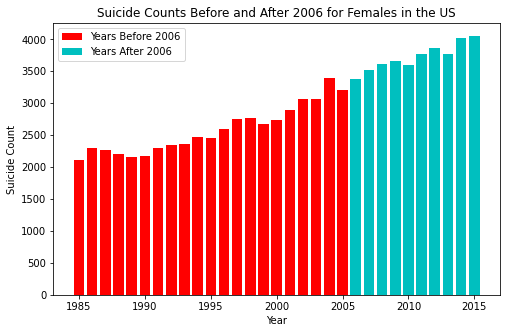

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

num_before2006 = num_of_suicides_before_2006_females # height
year_Before = data_of_suicides_before_2006_female_only.year # x

num_after2006 = num_of_suicides_after_2006_females # height 2
year_After = data_of_suicides_after_2006_female_only.year # x2

plt.figure(figsize=(8,5)) #modify figure size so chart is displayed 

plt.bar(x=year_Before, height= num_before2006, label = 'Years Before 2006', color = 'r')
plt.bar(x=year_After, height= num_after2006, label = 'Years After 2006', color= 'c')

plt.xlabel('Year')
plt.ylabel('Suicide Count')
plt.title('Suicide Counts Before and After 2006 for Females in the US')
plt.legend()
plt.show()


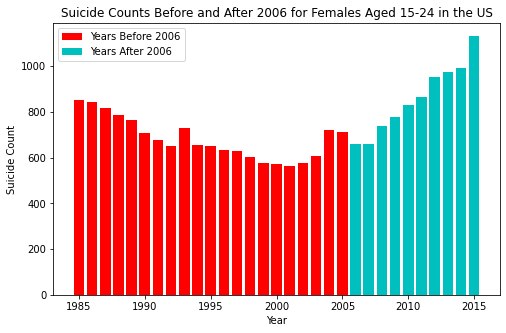

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Create for age group 15-24---before and after 2006--suicide counts

num_before2006_15to24 = suicide_data_before_2006_F_15to24_only # height
year_Before_15to24 = suicide_data_before_2006_F_15to24.year # x

num_after2006_15to24 = suicide_data_after_2006_F_15to24_only # height 2
year_After_15to24 = suicide_data_after_2006_F_15to24.year # x2

plt.figure(figsize=(8,5)) #modify figure size so chart is displayed 

plt.bar(x=year_Before_15to24, height= num_before2006_15to24, label = 'Years Before 2006', color = 'r')
plt.bar(x=year_After_15to24, height= num_after2006_15to24, label = 'Years After 2006', color= 'c')

plt.xlabel('Year')
plt.ylabel('Suicide Count')
plt.title('Suicide Counts Before and After 2006 for Females Aged 15-24 in the US')
plt.legend()
plt.show()


# As we can see, there has been an upward trend in suicides among females between the ages of 15 and 24
#in the United States, further supporting our 
# hypothesis that social media, such as Facebook, may have played a big role in this.

### Bar Charts: Sucide Counts for Females in US Based on Age Brackets

In [22]:
# By delving deeper into this issue, we found out that the highest suicide count was not among young women 15-24 yrs,
# But among middle age women, 35-54 years-- based on the maximum number of suicides that we had calculated earlier and also 
# the below graphical interpretations.

# From this new information, we can deduce that this would is likely to be a result of other life factors such as marraige
#work, or stress factors other than, social media.


In [23]:
df2 = united_states_female[['year','age','suicides_no']]

In [24]:
df3 = df2.groupby('age', as_index=False).sum() #total number of suicides grouped by age range, made sure age is not an
# index column

In [25]:
df3.columns

Index(['age', 'year', 'suicides_no'], dtype='object')

In [26]:
df3.drop('year',axis=1,inplace = True) #drop the year column permanently from the df3

In [27]:
df3

,age,suicides_no
0,15-24 years,22903
1,25-34 years,33796
2,35-54 years,91572
3,5-14 years,2447
4,55-74 years,48591
5,75+ years,14488


In [28]:
df3_list = [s for s in df3.suicides_no]

In [29]:
df3_list # list of the total counts of suicides for age ranges

[22903, 33796, 91572, 2447, 48591, 14488]

In [30]:
df3_list2 = [s for s in df3.age]

In [31]:
df3_list2 # list of age ranges

['15-24 years',
 '25-34 years',
 '35-54 years',
 '5-14 years',
 '55-74 years',
 '75+ years']

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


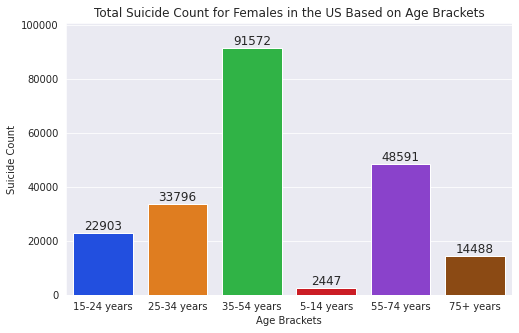

In [32]:
# Graph is of the total number (sum) of suicides for each age group

import seaborn as sns

age_ranges = df3_list2
counts = df3_list 

plt.figure(figsize=(8,5)) #modify figure size so chart is displayed 

sns.set_style('darkgrid')  # white backround with gray grid lines
axes = sns.barplot(age_ranges,counts, palette='bright', ci=None)# remove error bars
axes.set_title('Total Suicide Count for Females in the US Based on Age Brackets')
axes.set(xlabel='Age Brackets', ylabel='Suicide Count')

# Scale the y-axis 
axes.set_ylim(top=1.10*max(counts))

# Display the count above each bar
for bar, count in zip(axes.patches, counts):
    text_x = bar.get_x() + bar.get_width()/2 # ensure suicide counts are displayed on center of bar
    text_y = bar.get_height() 
    text = f'{count}' # stores values of the suicide counts
    axes.text(text_x, text_y, text, 
              fontsize=12, ha='center', va='bottom')

plt.show()  # display the chart 

In [33]:
df_bef = data_of_suicides_before_2006_female_only[['year','age','suicides_no']]

In [34]:
df_bef2 = round(df_bef.groupby('age', as_index=False).mean(),2) #find the avg number of suicides for females in US
# group by age range --years before 2006

In [35]:
df_bef2.drop('year',axis=1,inplace = True)

In [36]:
df_bef2 # DF after dropping the year column

,age,suicides_no
0,15-24 years,682.14
1,25-34 years,1056.00
2,35-54 years,2585.90
3,5-14 years,69.52
4,55-74 years,1299.90
5,75+ years,482.81


In [37]:
df_bef2_list = [s for s in df_bef2.suicides_no] # list of the avg counts of suicides for age ranges from before 2006

In [38]:
df_bef2_list2 = [s for s in df_bef2.age] # list of age ranges

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


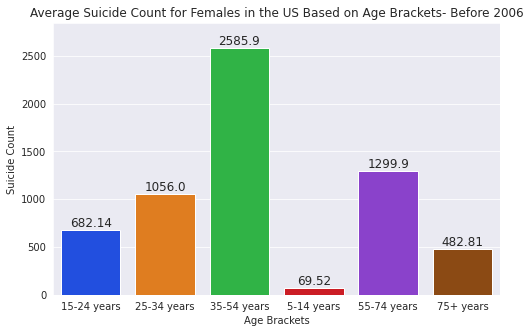

In [39]:
# Graph is of the avg number of suicides for each age group BEFORE Facebook came out to public

import seaborn as sns

age_ranges = df_bef2_list2
counts = df_bef2_list 

plt.figure(figsize=(8,5)) #modify figure size so chart is displayed 

sns.set_style('darkgrid')  # white backround with gray grid lines
axes = sns.barplot(age_ranges,counts, palette='bright', ci=None)# remove error bars
axes.set_title('Average Suicide Count for Females in the US Based on Age Brackets- Before 2006')
axes.set(xlabel='Age Brackets', ylabel='Suicide Count')

# Scale the y-axis 
axes.set_ylim(top=1.10*max(counts))

# Display the count above each bar
for bar, count in zip(axes.patches, counts):
    text_x = bar.get_x() + bar.get_width()/2 # ensure suicide counts are displayed on center of bar
    text_y = bar.get_height() 
    text = f'{count}' # stores values of the suicide counts
    axes.text(text_x, text_y, text, 
              fontsize=12, ha='center', va='bottom')

plt.show()  # display the chart 

In [40]:
df_aft = data_of_suicides_after_2006_female_only[['year','age','suicides_no']]

In [41]:
df_aft2 = round(df_aft.groupby('age', as_index=False).mean(),2)#find the avg number of suicides for females in US
# group by age range --years after 2006

In [42]:
df_aft2.drop('year',axis=1,inplace = True) # We can see an increase in the average number of suicides among almost all age groups after 2006 compared to before 2006...
# Interestingly, the only age group, 75+ year age group, seem to show the opposite trend; there seems to be a decrease in 
# number of suicides among that age group. 

In [43]:
df_aft2 # DF after dropping the year column

,age,suicides_no
0,15-24 years,857.8
1,25-34 years,1162.0
2,35-54 years,3726.8
3,5-14 years,98.7
4,55-74 years,2129.3
5,75+ years,434.9


In [44]:
df_aft2_list = [s for s in df_aft2.suicides_no]  # list of the avg counts of suicides for age ranges from after 2006

In [45]:
df_aft2_list2 = [s for s in df_aft2.age] # list of age ranges

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


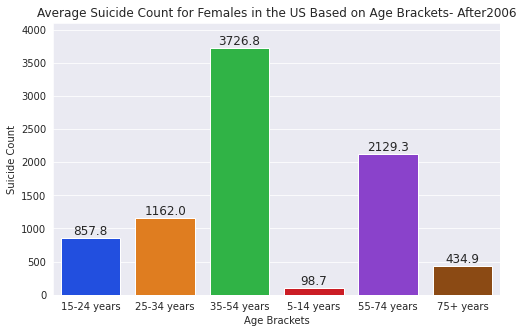

In [46]:
# Graph is of the avg number of suicides for each age group AFTER Facebook came out to public
import seaborn as sns

age_ranges = df_aft2_list2
counts = df_aft2_list 

plt.figure(figsize=(8,5)) #modify figure size so chart is displayed 

sns.set_style('darkgrid')  # white backround with gray grid lines
axes = sns.barplot(age_ranges,counts, palette='bright', ci=None)# remove error bars
axes.set_title('Average Suicide Count for Females in the US Based on Age Brackets- After2006')
axes.set(xlabel='Age Brackets', ylabel='Suicide Count')

# Scale the y-axis 
axes.set_ylim(top=1.10*max(counts))

# Display the count above each bar
for bar, count in zip(axes.patches, counts):
    text_x = bar.get_x() + bar.get_width()/2 # ensure suicide counts are displayed on center of bar
    text_y = bar.get_height() 
    text = f'{count}' # stores values of the suicide counts
    axes.text(text_x, text_y, text, 
              fontsize=12, ha='center', va='bottom')

plt.show()  # display the chart 

Results:

Based on our minimum and maximum calculations, the least number of suicides among women occurred back in 1999, before the rise of social media, such as Facebook. At the same time, we can see that the greatest number of suicides among women occurred in 2015, well after Facebook's rise in popularity. The emergence of new social media platforms such as Instagram and snapchat may have also played a role in this spike of suicides after 2006.

The minimum of suicides was 50 in the year 1999 for age group 5-14 years
The maximum of suicides was 4053 in the year 2015 for age group 35-54 years

We can also see that there has been an upward trend in suicides among females, specifically between the ages of 15 and 24, living in the United States, supporting our hypothesis that social media, in this case Facebook, has played a big role in the rise in suicides among young women. Surprisingly, based on our analysis, we also determined that the highest suicide count was not among young women 15-24 yrs., but middle age women, 35-54 years. Based on this information, we can deduce that this may likely be a result of other contributing factors in life such as marriage, work, or financial stress, that can occur during one's lifetime, usually during middle to late adulthood.

We also calculated the average number of suicides for each age group before and after Facebook came out to the public. There seems to be an increase in the average number of suicides among almost all age groups after 2006 compared to before 2006, including the 15-24 years age bracket, further supporting our hypothesis. Interestingly enough, the only age bracket, 75+ year age group, depicts the reverse trend; there seems to be a decrease in the number of suicides among that particular age group. Elderly individuals who are more socially connected are likely to have better mental health. Since Facebook is a convenient way to connect with others without leaving the house, it is possible that elderly individuals are feeling less lonely than they used to, less depressed and thus, less prone to commit suicide compared to other groups.

Conclusion:

Based on our analysis, we confirm that our hypothesis was correct; we did see an average rise in suicides among females between the ages of 15-24. However, the highest spike in suicides among females was in the 35-54 years age bracket. Lastly, we saw a decrease in the number of suicides among females in the 75+ age range. A myriad of contributing factors may have influenced the trends in suicides among females in the United States during our exploratory analysis. We expect the increase in suicide counts among females aged 15-24 to be a result of using Facebook and other new social media sites as young people use it more often and are impacted more heavily than other age groups. However, when it came to females aged 35-54 years, it is expected that other factors may have contributed to the high number of suicides, social media only playing a small role. As for females aged 75+, we see a reverse trend in suicide counts compared to all the other age groups. Essentially, it is difficult to compare suicides rates across various age groups as every phase of life is different. There could be one, or many factors, that lead someone to commit suicide. It all depends on which direction one is willing to take with their analysis. We believe a more accurate conclusion can be drawn by taking this analytical approach to the next level, which is by comparing females of similar age groups across various countries and see if this rise in suicides is seen only among young women in the United States or elsewhere too.